In [30]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_excel('retail-data/OnlineRetail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Check for missing values, handle duplicates, and clean the data.

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Check for the percentage of missing values.

In [7]:
df['CustomerID'].isnull().sum()/len(df)*100

24.926694334288598

In [8]:
df.dropna(subset=['CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
df['Description'].fillna('Unknown Product',inplace=True)

In [10]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## Exploratory Data Analysis

### Basic Statistics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df.dropna(subset=['CustomerID'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df.nunique() ### Return the number of unique values for each column:

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [16]:
df[df['Quantity'] <= 0] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [18]:
df = df[(df['Quantity']> 0) & (df['UnitPrice'] > 0)]

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
###Create a Total Sales Column
df['TotalSales']=df['Quantity']* df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<Axes: xlabel='TotalSales'>

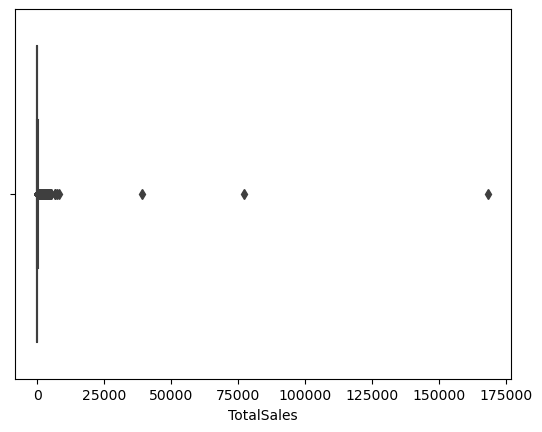

In [22]:
# Check for Outliers in Monetory Value
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['TotalSales'])


### Key Elements of the Boxplot
- The box (middle part): Represents the Interquartile Range (IQR) (25th to 75th percentile).

- The horizontal line inside the box: The median (middle value of the data).

- The "whiskers" (lines extending from the box): Show the range of most of the data, up to 1.5 times the IQR.

- The dots outside the whiskers: These are outliers, meaning they are extreme values that deviate significantly from the rest of the data.

#### What this boxplot shows 

- Most TotalSales values are clustered near 0, meaning most transactions are small purchases.

- There are extreme outliers (e.g., sales above 50,000, 75,000, and even 150,000).

- Skewed distribution: The data seems right-skewed (long tail on the right), meaning a few transactions have very high sales values.

## Step 1: Identify the Outliers


In [25]:
Q1 = df['TotalSales'].quantile(0.25)
Q3 = df['TotalSales'].quantile(0.75)
IQR = Q3-Q1 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 - 1.5 * IQR 
outliers = df[df['TotalSales'] > upper_bound]
outliers[['InvoiceNo', 'CustomerID', 'TotalSales', 'Quantity', 'UnitPrice', 'Description']]

,InvoiceNo,CustomerID,TotalSales,Quantity,UnitPrice,Description
0,536365,17850.0,15.30,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,17850.0,20.34,6,3.39,WHITE METAL LANTERN
2,536365,17850.0,22.00,8,2.75,CREAM CUPID HEARTS COAT HANGER
3,536365,17850.0,20.34,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,17850.0,20.34,6,3.39,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...,...,...,...
541904,581587,12680.0,10.20,12,0.85,PACK OF 20 SPACEBOY NAPKINS
541905,581587,12680.0,12.60,6,2.10,CHILDREN'S APRON DOLLY GIRL
541906,581587,12680.0,16.60,4,4.15,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,12680.0,16.60,4,4.15,CHILDRENS CUTLERY CIRCUS PARADE


## Step 2: Check if These Are Real Transactions

In [26]:
# Check if CustomerId is valid
outliers['CustomerID'].nunique()

4338

In [28]:
# If most outliers belong to a few customers, it may indicate high-value customers rather than errors.
outliers[['Quantity','UnitPrice']].describe()

## If Quantity is unrealistically high (e.g., 10,000+ units), it could be an error.

## If UnitPrice is unusually high (e.g., $1000 per unit for a cheap product), check for errors.

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [29]:
# Check if these transactions belong to a specific InvoiceNo
outliers['InvoiceNo'].value_counts()


576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
556918      1
556885      1
544170      1
556842      1
575830      1
Name: InvoiceNo, Length: 18532, dtype: int64

### Results from this investigation 
- Outliers Belong to Many Customers (4338 unique CustomerIDs)
- This means that high sales values are distributed across many customers, not just a single one.
- If it were an error, we'd expect only a few customers to be responsible for the outliers.

2️Quantity and UnitPrice Counts Are High (397,884 each) 
- The count suggests many transactions have high values, rather than just a few accidental errors.
- If Quantity or UnitPrice had extreme, unrealistic values (e.g., 1,000,000 units per order), we’d suspect an issue.

3️Some InvoiceNo Appear Hundreds of Times (Bulk Orders)
- InvoiceNo appearing 500+ times suggests bulk transactions (possibly wholesale orders).
- This aligns with legitimate business transactions rather than data entry errors.

### Conclusion: Keep Outliers, Use Log Transformation
Since these transactions seem valid, we should keep them and apply a log transformation for better visualization:

### Log Transformation 
**A log transformation, in the context of data analysis, is a mathematical process where each data value (x) is replaced with its logarithm (log(x), or more commonly ln(x) for the natural logarithm). It's often used to compress the range of values, reduce skewness, and transform multiplicative relationships into additive ones.** 

**Why log transformation?**
- It reduces the impact of extreme values while keeping all data.
- Makes the distribution more normal (which is better for segmentation & modeling).

<Axes: xlabel='LogTotalSales'>

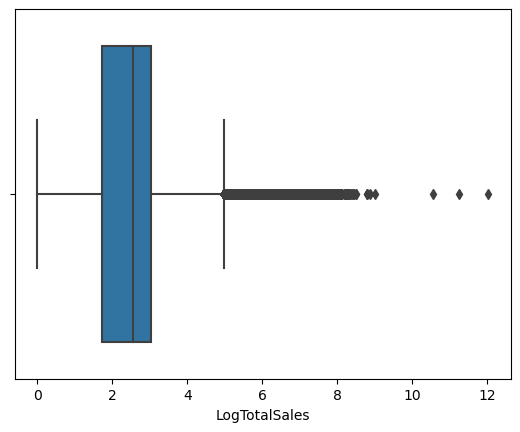

In [31]:
df['LogTotalSales'] = np.log1p(df['TotalSales']) # Apply Log Transformation.. 
sns.boxplot(x=df['LogTotalSales'])

## We will calculate RFM (Recency, Frequency, and Monetary Value) and use K-Means clustering for segmentation.
### Step 1 Prepare Data
- Convert date to datetime format
- Define the Analysis Date
- We need a reference date to calculate Recency (how recently a customer purchased).
- Use the latest invoice date + 1 day as the reference.

In [33]:
# Step 1 Prepare Data
## Convert date to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Define the Analysis Date
## We need a reference date to calculate Recency (how recently a customer purchased).
### Use the latest invoice date + 1 day as the reference.

analysis_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

## Step 2 Calculate RFM Metrics
- Calculate Recency
- Calculate Frequency
- Calculate Monetory Value
- Merge RFM Metrics

In [37]:
# 1. Calculate Recency 
## Recency measures how many days since the last purchase.
rfm = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm['Recency'] = (analysis_date - rfm['InvoiceDate']).dt.days


In [41]:
# Calculate Frequency 
# Frequency is the number of unique purchases per customer.
freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
freq.columns = ['CustomerID','Frequency']
freq.sort_values(by='Frequency', ascending=False)



,CustomerID,Frequency
326,12748.0,209
1879,14911.0,201
4010,17841.0,124
562,13089.0,97
1661,14606.0,93
...,...,...
2179,15314.0,1
2178,15313.0,1
2175,15308.0,1
2174,15307.0,1


In [44]:
# Calculate Monetary Value (M)
## Monetary is the total revenue from each customer.
monetory=df.groupby('CustomerID')['TotalSales'].sum().reset_index()
monetory.columns =['CustomerID','Monetary']
monetory.sort_values(by='Monetary', ascending= False)

,CustomerID,Monetary
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06
...,...,...
3323,16878.0,13.30
4098,17956.0,12.75
3014,16454.0,6.90
1793,14792.0,6.20


In [45]:
# Merge RFM metrics
rfm = rfm.merge(freq, on='CustomerID').merge(monetory, on='CustomerID')
rfm = rfm[['CustomerID','Recency','Frequency','Monetary']]
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2094.88


### Step 3: Apply K-Means Clustering


### Standardize the Data ###
* **K-Means requires standardization because the scales of Recency, Frequency, and Monetary differ.**
* **Find Optimal K Using Elbow Method**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
rfm_scaled=scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

Text(0.5, 1.0, 'Elbow Method')

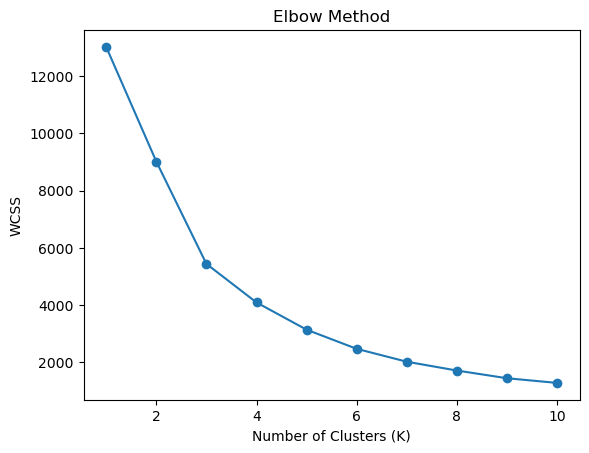

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')


In [49]:
#Apply K-Means Clustering
# Let's assume K=4 based on the elbow method.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [50]:
# Step 4: Interpret the Clusters
## Get Cluster Characteristics
### 🔹 This shows the average RFM values for each segment.


rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,248.564030,1.551789,478.107581,1062
1,15.672986,22.047393,12453.225924,211
2,7.384615,82.538462,127338.313846,13
3,43.920380,3.656291,1350.140532,3052


### **2️ Label Customer Segments** 
Based on RFM values: 
* **Best Customers**: High Frequency, High Monetary, Low Recency 
* **Loyal Customers**: High Frequency, Medium Recency 
* **Churned Customers**: High Recency, Low Frequency, Low Monetary 
* **Big Spenders**: High Monetary, Low Frequency



## **📝 Detailed Explanation: RFM Analysis & Customer Segmentation**  

### **🚀 Overview**  
In this exercise, we performed **RFM analysis** to segment customers based on their purchasing behavior. Then, we used **K-Means clustering** to group similar customers. Let’s break down everything we did step by step.

---

# **📌 Step 1: Data Preparation**  
Before performing any analysis, we needed to ensure our dataset was clean and structured properly.  

### **✅ Key Cleaning Steps:**  
1️⃣ Converted `InvoiceDate` into a **datetime format** so we could calculate recency.  
2️⃣ Defined an **analysis date** (1 day after the last purchase) to compute recency.  
3️⃣ Removed **negative Quantity** and **zero UnitPrice** values, as they were likely errors or refunds.  
4️⃣ Handled missing data by **removing rows without CustomerID** and filling missing product descriptions with "Unknown Product."  
5️⃣ Identified and analyzed **outliers** using a boxplot and decided to **keep them** since they were real transactions.

---

# **📌 Step 2: Understanding RFM Analysis**  
### **🛒 What is RFM?**  
RFM stands for **Recency, Frequency, and Monetary Value**. It is a technique used to **segment customers based on their purchasing behavior**.  

| Metric      | Meaning | Why It Matters |
|-------------|--------|----------------|
| **Recency (R)** | Number of days since the customer's last purchase | More recent buyers are **more likely to buy again** |
| **Frequency (F)** | Total number of purchases made by the customer | High-frequency buyers are **loyal customers** |
| **Monetary (M)** | Total amount spent by the customer | Higher monetary value means **high-value customers** |

**💡 Goal:** Find out which customers are our **best customers, loyal buyers, or at risk of churning**.  

### **📊 How We Calculated RFM?**  
- **Recency:** The number of days since a customer’s last purchase.  
  ```python
  rfm = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
  rfm['Recency'] = (analysis_date - rfm['InvoiceDate']).dt.days
  ```
- **Frequency:** The total number of unique purchases made by each customer.  
  ```python
  freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
  freq.columns = ['CustomerID', 'Frequency']
  ```
- **Monetary:** The total amount each customer has spent.  
  ```python
  monetary = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
  monetary.columns = ['CustomerID', 'Monetary']
  ```
- **Final RFM Table:** Combined all metrics into a single dataframe.  
  ```python
  rfm = rfm.merge(freq, on='CustomerID').merge(monetary, on='CustomerID')
  rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
  ```

---

# **📌 Step 3: Understanding K-Means Clustering**  
### **🤖 What is K-Means?**  
K-Means is an **unsupervised machine learning algorithm** used for clustering. It groups similar data points into **K distinct clusters**.  

### **🛠 How Does K-Means Work?**  
1️⃣ Pick a number **K** (the number of clusters).  
2️⃣ Select **K random points** as the initial cluster centers.  
3️⃣ Assign each data point to the **nearest cluster center**.  
4️⃣ Compute new **centroids** for each cluster.  
5️⃣ Repeat until **clusters don’t change much** (convergence).  

### **📊 Why Standardization?**  
- Recency is in **days** (e.g., 1–365).  
- Frequency is in **counts** (e.g., 1–500).  
- Monetary is in **currency** (e.g., $10–$100,000).  
- Since these units are different, we **standardized** them:  
  ```python
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
  ```

### **📌 Step 4: Choosing the Right Number of Clusters (K)**
We used the **Elbow Method** to find the best **K value** by plotting Within-Cluster Sum of Squares (WCSS).  
```python
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
```
📌 **Interpretation:**  
- **Lower WCSS** means **better clustering**.  
- The **"elbow point"** (where the curve bends) gives the best number of clusters.

---

# **📌 Step 5: Interpreting Customer Clusters**
After running K-Means with **K=4 clusters**, we analyzed the characteristics of each group.  

```python
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
```
### **💡 What Do These Clusters Mean?**  
| Cluster | Characteristics | Business Meaning |
|---------|----------------|------------------|
| **Best Customers** | Low Recency, High Frequency, High Monetary | Most valuable, frequent buyers. Retain them with loyalty programs. |
| **Loyal Customers** | Medium Recency, High Frequency, Medium Monetary | Regular buyers. Encourage them with exclusive offers. |
| **Churned Customers** | High Recency, Low Frequency, Low Monetary | Customers who haven’t purchased in a long time. Retarget them with promotions. |
| **Big Spenders** | Low Recency, Low Frequency, High Monetary | Customers who spend a lot but buy rarely. Offer high-value deals to keep them engaged. |

---

# **🚀 Next Steps**
Now that we have identified different customer segments, we can:  
✅ **Visualize the clusters** with scatter plots & heatmaps.  
✅ **Develop marketing strategies** for each customer group.  
✅ **Predict future customer behavior** using machine learning.


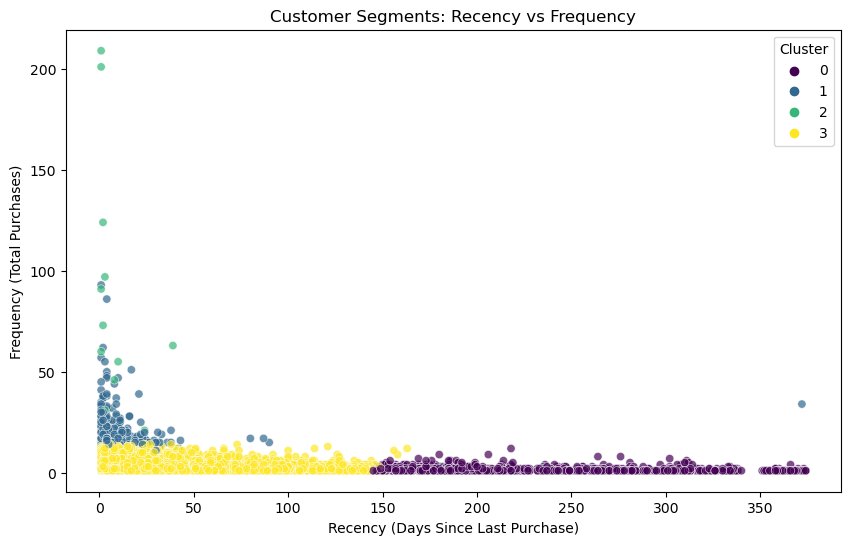

In [55]:
# ScatterPlot for Clusters 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Total Purchases)')
plt.legend(title='Cluster')

## Interpretation:

## Top Left: Frequent buyers with recent purchases (Loyal Customers & Best Customers).

## Bottom Right: Customers who haven’t purchased in a long time (Churned Customers).

## **Step 2: Boxplots for RFM Metrics by Cluster** ##
 This will help us see how **Recency, Frequency, and Monetary** differ across clusters.

Text(0.5, 1.0, 'Monetary Distribution by Cluster')

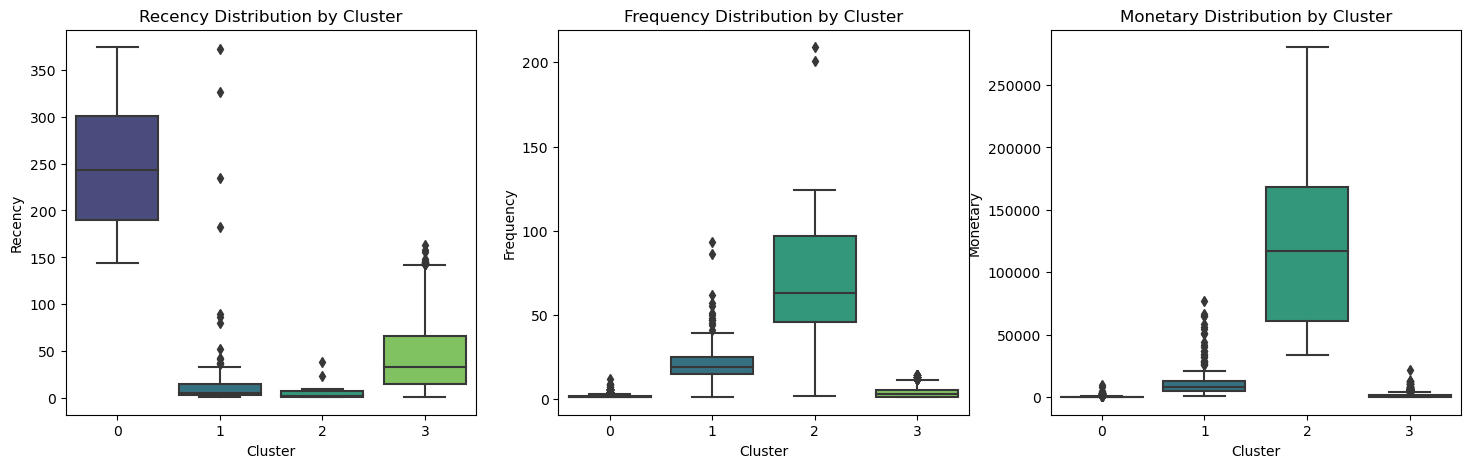

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Boxplot
sns.boxplot(data=rfm, x='Cluster', y='Recency', palette='viridis', ax=axes[0])
axes[0].set_title('Recency Distribution by Cluster')

# Frequency Boxplot
sns.boxplot(data=rfm, x='Cluster', y='Frequency', palette='viridis', ax=axes[1])
axes[1].set_title('Frequency Distribution by Cluster')

# Monetary Boxplot
sns.boxplot(data=rfm, x='Cluster', y='Monetary', palette='viridis', ax=axes[2])
axes[2].set_title('Monetary Distribution by Cluster')




**Interpretation**: 
* **Recency:** Lower Recency = More active customers. 
* **Frequency:** Higher Frequency = More loyal customers. 
* **Monetary:** Some clusters have **high-spending** customers, others are low-value.

### Step 3: 3D Scatter Plot (Recency, Frequency, Monetary)
#### **We can create a 3D visualization to see how all three RFM features relate to each other.**
### Interpretation:

* The tightest cluster might be the best customers (low Recency, high Frequency & Monetary).
* The widely spread cluster might be churned customers (high Recency, low Frequency & Monetary).

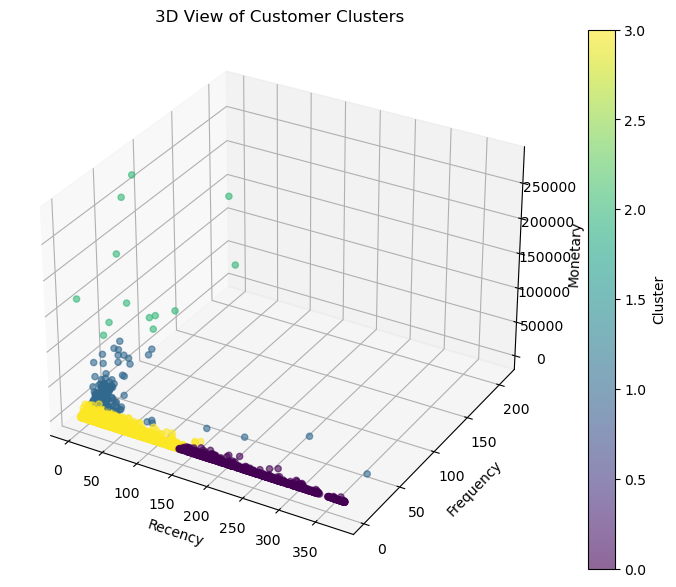

In [57]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of Customer Clusters')
plt.colorbar(sc, label="Cluster")

